# Airfoil Self-Noise Prediction: Random Forest Regressor

This notebook demonstrates how to predict airfoil self-noise sound pressure levels using a Random Forest Regressor.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

## 1. Load Data

In [3]:
# Load the dataset
# The dataset does not have a header, so we specify header=0 if the first row is header, or names if we need to provide them.
# Based on previous inspection, the first row is a header.
file_path = '../data/AirfoilSelfNoise.csv'
df = pd.read_csv(file_path)

# Display first few rows
df.head()

,f,alpha,c,U_infinity,delta,SSPL
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


## 2. Exploratory Data Analysis (EDA)

In [4]:
# Check for missing values
print(df.isnull().sum())

f             0
alpha         0
c             0
U_infinity    0
delta         0
SSPL          0
dtype: int64


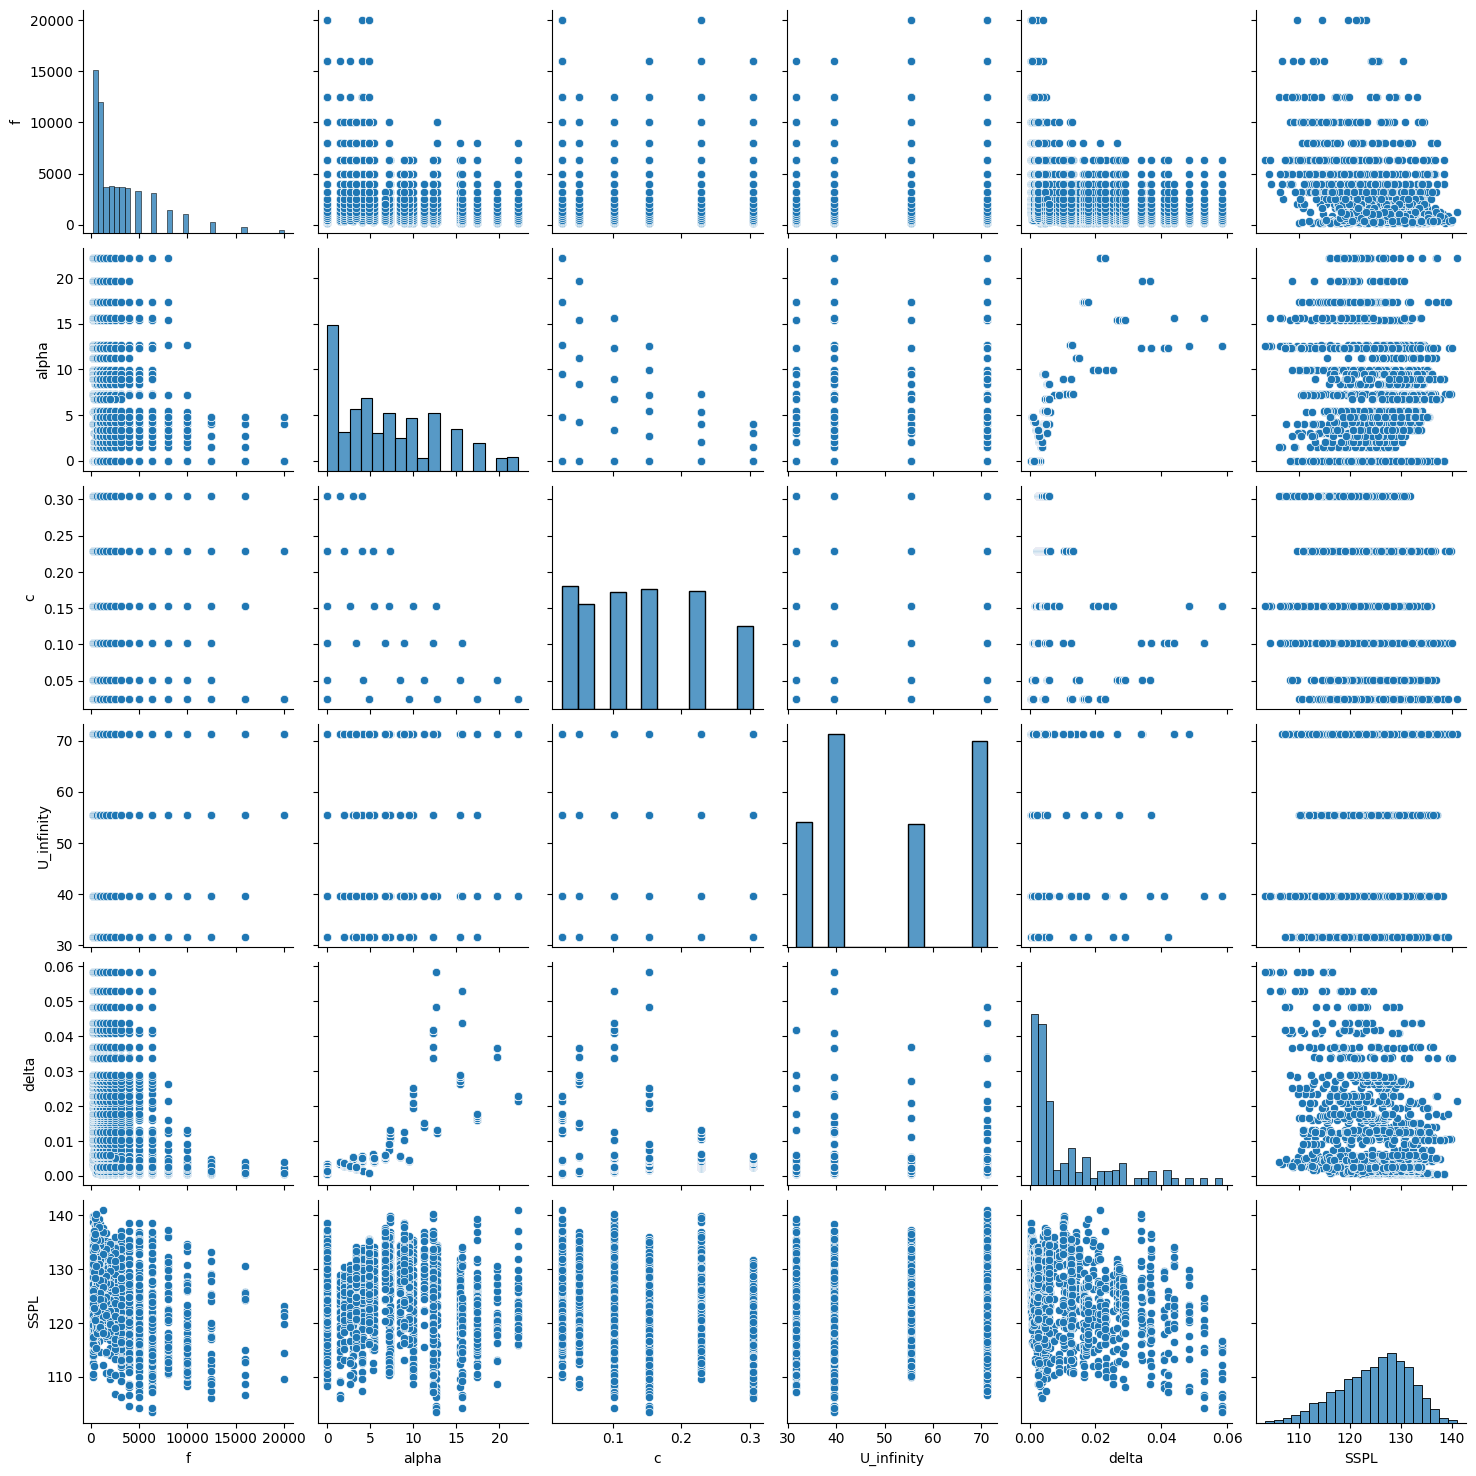

In [5]:
# Pairplot to see relationships
sns.pairplot(df)
plt.show()

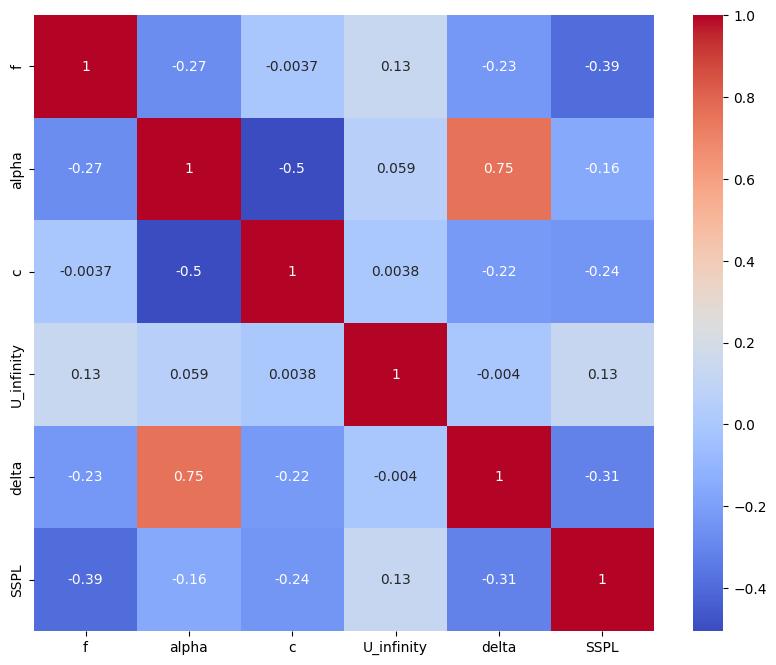

In [6]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

## 3. Data Preprocessing

In [7]:
# Define features (X) and target (y)
# The last column is the target (Sound Pressure Level)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (1202, 5)
Testing set size: (301, 5)


## 4. Train Random Forest Model

In [8]:
# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## 5. Evaluation

In [9]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 3.28
Root Mean Squared Error: 1.81
R-squared Score: 0.93


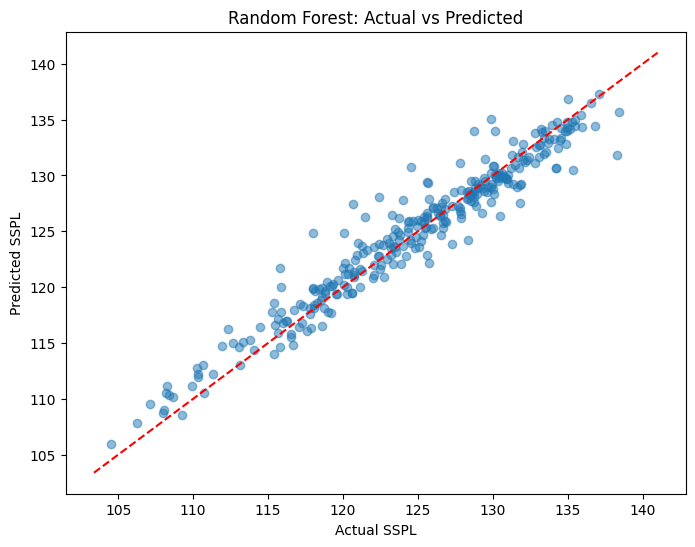

In [10]:
# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual SSPL')
plt.ylabel('Predicted SSPL')
plt.title('Random Forest: Actual vs Predicted')
plt.show()

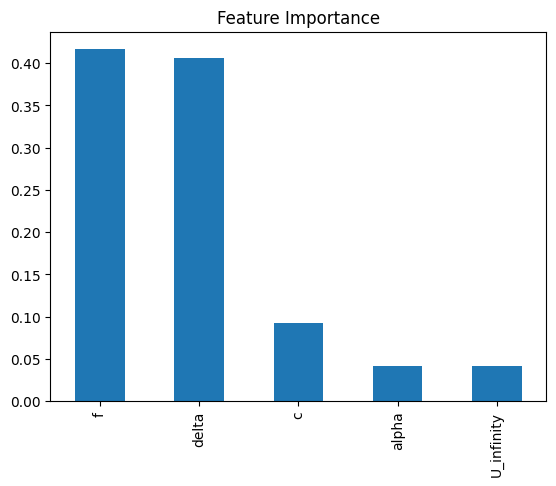

In [11]:
# Feature Importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance')
plt.show()